In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bellabeat-dataset/Fitabase Data 4.12.16-5.12.16/minuteCaloriesNarrow_merged.csv
/kaggle/input/bellabeat-dataset/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv
/kaggle/input/bellabeat-dataset/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv
/kaggle/input/bellabeat-dataset/Fitabase Data 4.12.16-5.12.16/minuteIntensitiesWide_merged.csv
/kaggle/input/bellabeat-dataset/Fitabase Data 4.12.16-5.12.16/minuteMETsNarrow_merged.csv
/kaggle/input/bellabeat-dataset/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv
/kaggle/input/bellabeat-dataset/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv
/kaggle/input/bellabeat-dataset/Fitabase Data 4.12.16-5.12.16/minuteSleep_merged.csv
/kaggle/input/bellabeat-dataset/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv
/kaggle/input/bellabeat-dataset/Fitabase Data 4.12.16-5.12.16/minuteStepsNarrow_merged.csv
/kaggle/input/bellabeat-dataset/Fitabase Data 4.12.16-5.12.16/minuteStepsWide_merged.csv
/kaggle/input/bellabeat

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
plt.style.use('ggplot')
import datetime as dt
#pd.set_option('max_column')

In [3]:
df = pd.read_csv('/kaggle/input/bellabeat-dataset/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv')

In [4]:
df.shape

(940, 15)

In [5]:
df.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')

In [6]:
df.head(12)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863
5,1503960366,4/17/2016,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728
6,1503960366,4/18/2016,13019,8.59,8.59,0.0,3.25,0.64,4.71,0.0,42,16,233,1149,1921
7,1503960366,4/19/2016,15506,9.88,9.88,0.0,3.53,1.32,5.03,0.0,50,31,264,775,2035
8,1503960366,4/20/2016,10544,6.68,6.68,0.0,1.96,0.48,4.24,0.0,28,12,205,818,1786
9,1503960366,4/21/2016,9819,6.34,6.34,0.0,1.34,0.35,4.65,0.0,19,8,211,838,1775


In [7]:
df.dtypes

Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object

In [8]:
# clean the data
df['Id'] = df['Id'].astype(str)
df['ActivityDate'] = pd.to_datetime(df['ActivityDate'], format='%m/%d/%Y')
df.dtypes


Id                                  object
ActivityDate                datetime64[ns]
TotalSteps                           int64
TotalDistance                      float64
TrackerDistance                    float64
LoggedActivitiesDistance           float64
VeryActiveDistance                 float64
ModeratelyActiveDistance           float64
LightActiveDistance                float64
SedentaryActiveDistance            float64
VeryActiveMinutes                    int64
FairlyActiveMinutes                  int64
LightlyActiveMinutes                 int64
SedentaryMinutes                     int64
Calories                             int64
dtype: object

In [9]:
print(df.columns)

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')


In [11]:
day_of_week = df['ActivityDate'].dt.strftime('%A')
df['DayOfWeek'] = day_of_week
df['n_day_of_week'] = df['ActivityDate'].dt.weekday  

In [12]:
df.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories', 'DayOfWeek',
       'n_day_of_week'],
      dtype='object')

In [13]:
df.head(4)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,DayOfWeek,n_day_of_week
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday,1
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,Wednesday,2
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,Thursday,3
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,Friday,4


In [14]:
# checking null values 
df.isna().sum()

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
DayOfWeek                   0
n_day_of_week               0
dtype: int64

In [16]:
# checking number of duplicates
df.duplicated().sum()

0

In [17]:
print(df.columns)

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories', 'DayOfWeek',
       'n_day_of_week'],
      dtype='object')


In [18]:
# Subset of the data
df = df[['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance',
         'VeryActiveMinutes', 'FairlyActiveMinutes',
         'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories', 'DayOfWeek']].copy()

In [19]:
df

,Id,ActivityDate,TotalSteps,TotalDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,DayOfWeek
0,1503960366,2016-04-12,13162,8.500000,25,13,328,728,1985,Tuesday
1,1503960366,2016-04-13,10735,6.970000,21,19,217,776,1797,Wednesday
2,1503960366,2016-04-14,10460,6.740000,30,11,181,1218,1776,Thursday
3,1503960366,2016-04-15,9762,6.280000,29,34,209,726,1745,Friday
4,1503960366,2016-04-16,12669,8.160000,36,10,221,773,1863,Saturday
...,...,...,...,...,...,...,...,...,...,...
935,8877689391,2016-05-08,10686,8.110000,17,4,245,1174,2847,Sunday
936,8877689391,2016-05-09,20226,18.250000,73,19,217,1131,3710,Monday
937,8877689391,2016-05-10,10733,8.150000,18,11,224,1187,2832,Tuesday
938,8877689391,2016-05-11,21420,19.559999,88,12,213,1127,3832,Wednesday


In [20]:
print(df.columns)

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance',
       'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes',
       'SedentaryMinutes', 'Calories', 'DayOfWeek'],
      dtype='object')


In [21]:
# analysis
# category 01
# Sedentary: less than 5000 on average 
# active: between 5000 to 10000 on average
# very: active More than 10000 on average
Id_grp= df.groupby(['Id'])
Id_avg_step = Id_grp['TotalSteps']. mean().sort_values(ascending=False)
Id_avg_step = Id_avg_step.to_frame()

conditions = [
    (Id_avg_step['TotalSteps'] <= 5000),
    (Id_avg_step['TotalSteps'] > 5000) & (Id_avg_step['TotalSteps'] < 10000),
    (Id_avg_step['TotalSteps'] >= 10000)
]

values = ['Sedentary', 'Active', 'Very Active']

# Use numpy.select to assign categories
Id_avg_step['ActivityLevel'] = np.select(conditions, values)
Id_ActivityLevel=Id_avg_step['ActivityLevel']


df['ActivityLevel']=[ Id_ActivityLevel [c] for c in df['Id']]

In [22]:
# caterogy 02
# low use: less than 8 hours per day
# nomal use: between 8 to 16 hours of use per day
# active use: more than 16 hours of use per day 
df.head(4)

,Id,ActivityDate,TotalSteps,TotalDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,DayOfWeek,ActivityLevel
0,1503960366,2016-04-12,13162,8.50,25,13,328,728,1985,Tuesday,Very Active
1,1503960366,2016-04-13,10735,6.97,21,19,217,776,1797,Wednesday,Very Active
2,1503960366,2016-04-14,10460,6.74,30,11,181,1218,1776,Thursday,Very Active
3,1503960366,2016-04-15,9762,6.28,29,34,209,726,1745,Friday,Very Active


In [23]:
df.describe()

,ActivityDate,TotalSteps,TotalDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,940,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,2016-04-26 06:53:37.021276672,7637.910638,5.489702,21.164894,13.564894,192.812766,991.210638,2303.609574
min,2016-04-12 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016-04-19 00:00:00,3789.750000,2.620000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,2016-04-26 00:00:00,7405.500000,5.245000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,2016-05-04 00:00:00,10727.000000,7.712500,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,2016-05-12 00:00:00,36019.000000,28.030001,210.000000,143.000000,518.000000,1440.000000,4900.000000
std,NaN,5087.150742,3.924606,32.844803,19.987404,109.174700,301.267437,718.166862


In [24]:
df.head(4)

,Id,ActivityDate,TotalSteps,TotalDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,DayOfWeek,ActivityLevel
0,1503960366,2016-04-12,13162,8.50,25,13,328,728,1985,Tuesday,Very Active
1,1503960366,2016-04-13,10735,6.97,21,19,217,776,1797,Wednesday,Very Active
2,1503960366,2016-04-14,10460,6.74,30,11,181,1218,1776,Thursday,Very Active
3,1503960366,2016-04-15,9762,6.28,29,34,209,726,1745,Friday,Very Active


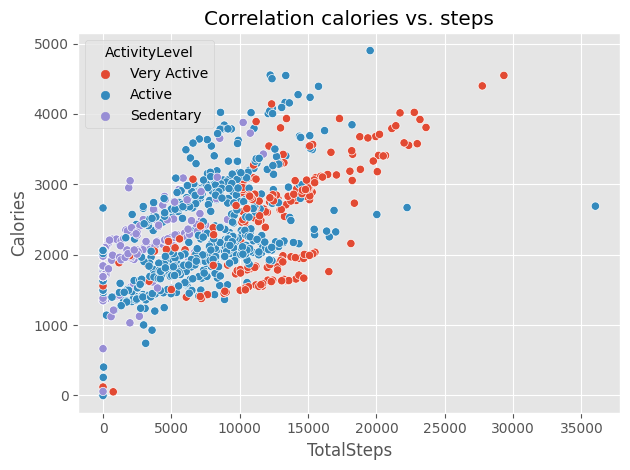

In [25]:
# Share
# Correlation Between Steps and Calories burned
ax = sns.scatterplot(x='TotalSteps', y='Calories', data=df, hue=df['ActivityLevel'])
plt.title('Correlation calories vs. steps')
plt.tight_layout()
plt.show()

<BarContainer object of 7 artists>

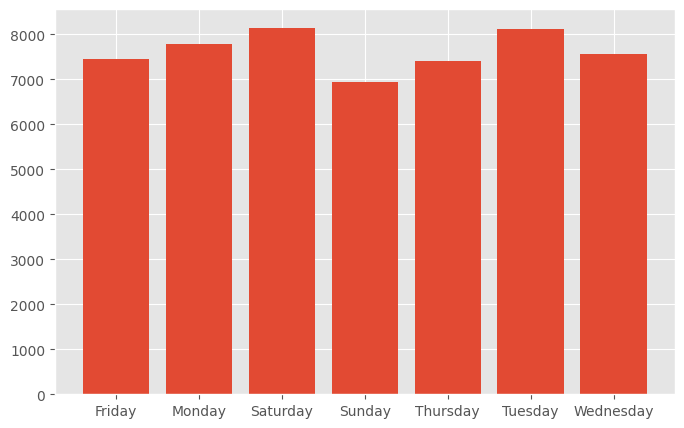

In [26]:
# average steps per day
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

# Group by day of the week
day_grp = df.groupby(['DayOfWeek'])
avg_daily_steps = day_grp['TotalSteps'].mean()  # Calculate the mean steps per day of the week
avg_steps = df['TotalSteps'].mean()  # Overall average steps (optional)

# Plot the data
plt.bar(avg_daily_steps.index, avg_daily_steps)


In [27]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [28]:
df['DayOfWeek'] = pd.Categorical(df['DayOfWeek'], categories=day_order, ordered=True)

In [29]:
avg_daily_steps = df.groupby('DayOfWeek')['TotalSteps'].mean()

<ipython-input-29-839459656163>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_daily_steps = df.groupby('DayOfWeek')['TotalSteps'].mean()


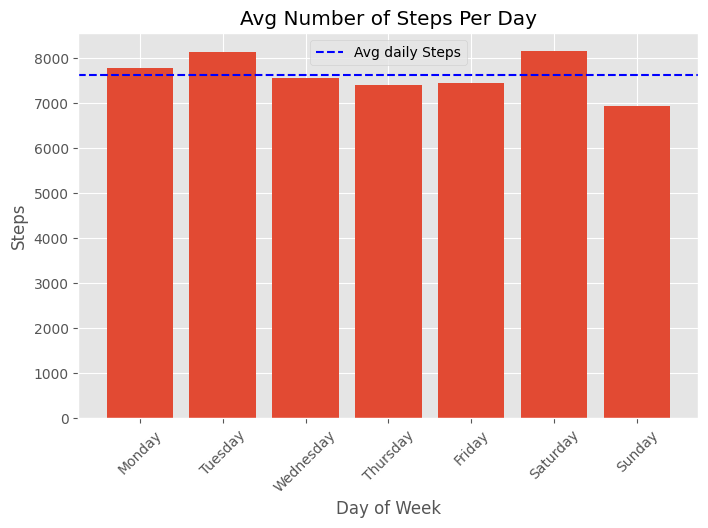

In [30]:


fig, ax = plt.subplots(1, 1, figsize=(8, 5))
plt.bar(avg_daily_steps.index, avg_daily_steps)

# Customize the plot
plt.title('Average Steps Per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Steps')
plt.xticks(rotation=45)

# Add a horizontal line for average steps
ax.axhline(y=avg_daily_steps.mean(), color='blue', linestyle='--', label='Avg daily Steps')

# Further customize the plot
ax.set_ylabel('Steps')
ax.set_xlabel('Day of Week')
ax.set_title('Avg Number of Steps Per Day')
plt.legend()  # Corrected from plt.Legend()

# Show the plot
plt.show()





In [31]:
df

,Id,ActivityDate,TotalSteps,TotalDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,DayOfWeek,ActivityLevel
0,1503960366,2016-04-12,13162,8.500000,25,13,328,728,1985,Tuesday,Very Active
1,1503960366,2016-04-13,10735,6.970000,21,19,217,776,1797,Wednesday,Very Active
2,1503960366,2016-04-14,10460,6.740000,30,11,181,1218,1776,Thursday,Very Active
3,1503960366,2016-04-15,9762,6.280000,29,34,209,726,1745,Friday,Very Active
4,1503960366,2016-04-16,12669,8.160000,36,10,221,773,1863,Saturday,Very Active
...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,2016-05-08,10686,8.110000,17,4,245,1174,2847,Sunday,Very Active
936,8877689391,2016-05-09,20226,18.250000,73,19,217,1131,3710,Monday,Very Active
937,8877689391,2016-05-10,10733,8.150000,18,11,224,1187,2832,Tuesday,Very Active
938,8877689391,2016-05-11,21420,19.559999,88,12,213,1127,3832,Wednesday,Very Active


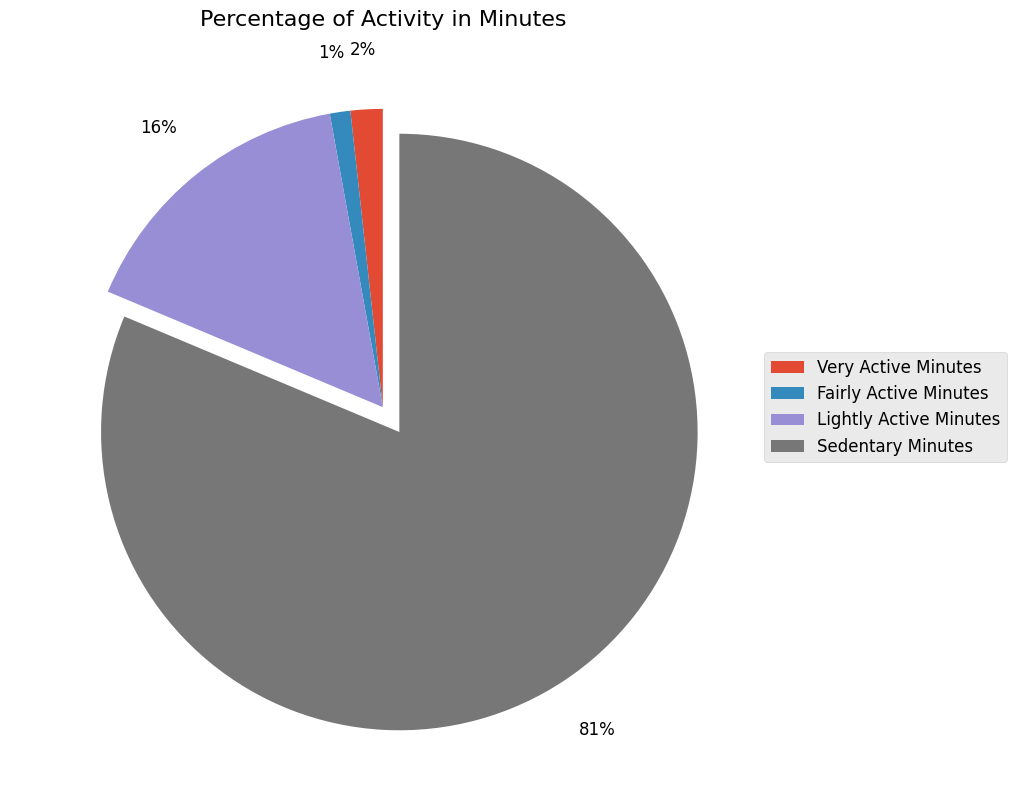

In [61]:
import matplotlib.pyplot as plt

# Define the data for the pie chart
VeryActiveMins = df['VeryActiveMinutes'].sum()
FairlyActiveMins = df['FairlyActiveMinutes'].sum()
LightlyActiveMins = df['LightlyActiveMinutes'].sum()
SedentaryMins = df['SedentaryMinutes'].sum()

slices = [VeryActiveMins, FairlyActiveMins, LightlyActiveMins, SedentaryMins]
labels = ['Very Active Minutes', 'Fairly Active Minutes', 'Lightly Active Minutes', 'Sedentary Minutes']
explode = [0, 0, 0, 0.1]  # Highlight the sedentary slice

# Create the pie chart
plt.figure(figsize=(10, 8))  # Increase figure size for better readability
plt.pie(
    slices,                      # Data for the pie chart
    labels=None,                 # No labels directly on the pie
    explode=explode,             # Highlight the sedentary slice
    autopct='%0.0f%%',           # Show percentages outside the pie
    startangle=90,               # Start from 90 degrees
    pctdistance=1.2,             # Move percentages further outside the pie
    textprops={'fontsize': 12}   # Set font size for percentages
)

# Add a legend for labels, positioned outside the chart
plt.legend(
    labels,                      # Use the labels list for the legend
    loc='center left',           # Position the legend to the left
    bbox_to_anchor=(1, 0.5),     # Move legend to the right of the pie
    fontsize=12                  # Set font size for readability
)

# Add a title to the chart
plt.title('Percentage of Activity in Minutes', fontsize=16)

# Adjust layout to prevent clipping
plt.tight_layout()

# Display the pie chart
plt.show()



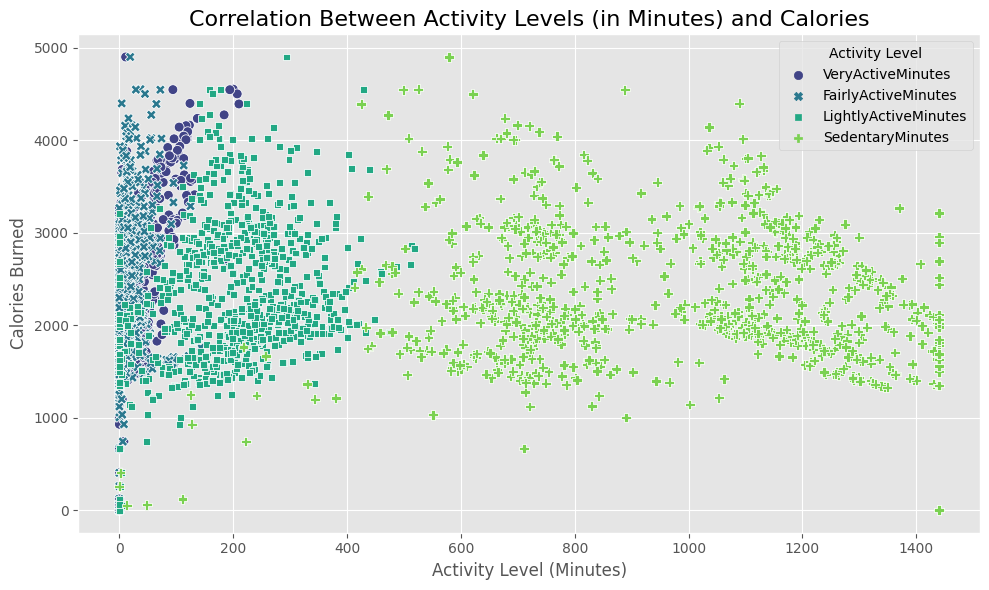

In [62]:
# Melt the DataFrame to reshape it for easier plotting
df_melted = df.melt(
    id_vars=['Calories'],  # Use the actual name of the calories column
    value_vars=['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes'], 
    var_name='ActivityLevel', 
    value_name='minutes'
)

# Create the scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_melted, 
    x='minutes', 
    y='Calories',  # Use the actual name of the calories column
    hue='ActivityLevel', 
    style='ActivityLevel', 
    palette='viridis', 
    s=50
)

# Customize the plot
plt.title('Correlation Between Activity Levels (in Minutes) and Calories', fontsize=16)
plt.xlabel('Activity Level (Minutes)', fontsize=12)
plt.ylabel('Calories Burned', fontsize=12)
plt.legend(title='Activity Level')
plt.tight_layout()

# Display the plot
plt.show()


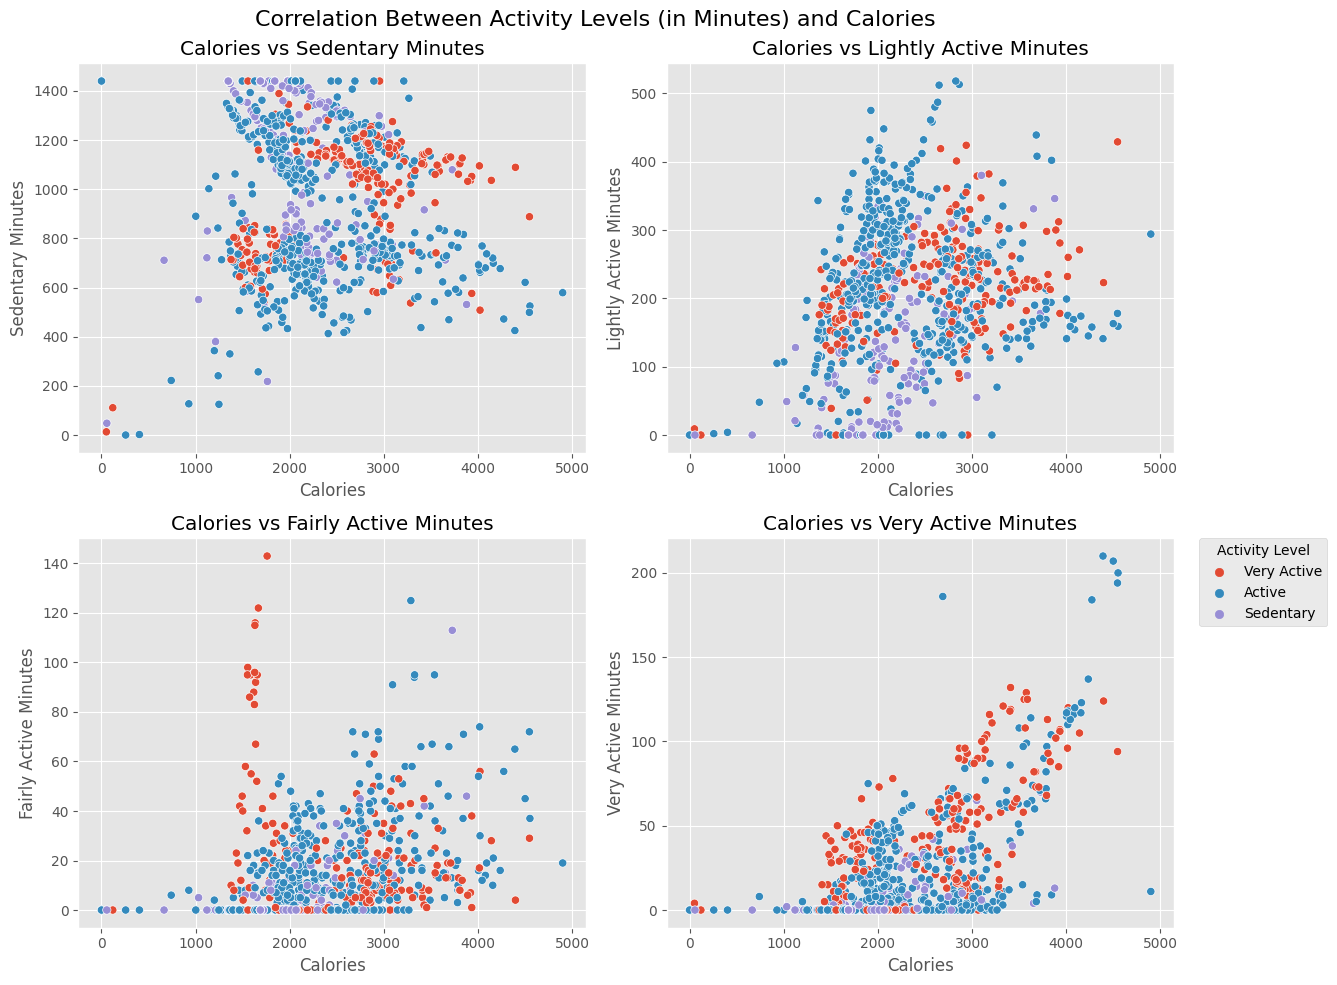

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10), dpi=100)

# Scatterplot for Sedentary Minutes
sns.scatterplot(
    data=df, 
    x='Calories', 
    y='SedentaryMinutes', 
    hue='ActivityLevel', 
    ax=axes[0, 0], 
    legend=False
)
axes[0, 0].set_title('Calories vs Sedentary Minutes')
axes[0, 0].set_xlabel('Calories')
axes[0, 0].set_ylabel('Sedentary Minutes')

# Scatterplot for Lightly Active Minutes
sns.scatterplot(
    data=df, 
    x='Calories', 
    y='LightlyActiveMinutes', 
    hue='ActivityLevel', 
    ax=axes[0, 1], 
    legend=False
)
axes[0, 1].set_title('Calories vs Lightly Active Minutes')
axes[0, 1].set_xlabel('Calories')
axes[0, 1].set_ylabel('Lightly Active Minutes')

# Scatterplot for Fairly Active Minutes
sns.scatterplot(
    data=df, 
    x='Calories', 
    y='FairlyActiveMinutes', 
    hue='ActivityLevel', 
    ax=axes[1, 0], 
    legend=False
)
axes[1, 0].set_title('Calories vs Fairly Active Minutes')
axes[1, 0].set_xlabel('Calories')
axes[1, 0].set_ylabel('Fairly Active Minutes')

# Scatterplot for Very Active Minutes
scatter = sns.scatterplot(
    data=df, 
    x='Calories', 
    y='VeryActiveMinutes', 
    hue='ActivityLevel', 
    ax=axes[1, 1]
)
axes[1, 1].set_title('Calories vs Very Active Minutes')
axes[1, 1].set_xlabel('Calories')
axes[1, 1].set_ylabel('Very Active Minutes')

# Adjust layout
fig.suptitle('Correlation Between Activity Levels (in Minutes) and Calories', fontsize=16)
plt.tight_layout()

# Add legend outside the plots
plt.legend(
    title='Activity Level', 
    bbox_to_anchor=(1.05, 1), 
    loc='upper left', 
    borderaxespad=0.
)

# Show plot
plt.show()


In [64]:
# Key Findings from the Analysis

# 1. Correlation Between Steps and Calories:
#   A clear positive correlation exists between steps taken and calories burned.
#   Higher activity intensity (e.g., "Very Active") results in more calories burned for the same step count 
#   compared to "Sedentary" or "Active" levels.

# 2. Average Steps Per Day:
#   Step counts are consistent on weekdays, with a slight increase on Saturdays.
#   Sundays show a noticeable drop in activity, indicating potential rest or relaxation days.

# 3. Activity Distribution (Pie Chart):
#   81% of the time is classified as sedentary, which might include sleep or unmonitored time 
#   when the device is not worn.
#   Lightly active minutes make up 16%, while very active and fairly active minutes are minimal at 1% and 2%, respectively.

# 4. Calories Burned vs. Activity Levels:
#   "Very Active Minutes" show the strongest positive correlation with calories burned, 
#    followed by "Fairly Active Minutes."
#    Sedentary and lightly active minutes contribute significantly less to calorie burn.

# 5. Sedentary Percentage Caveat:
#    The high sedentary percentage might be deceptive as it could include sleep time 
#    or periods when the fitness band is not worn.
#    Adjusting the analysis to account for sleep or unmonitored time could provide a clearer picture of wakeful sedentary behavior.

# 6. Actionable Recommendations:
#    Encourage increasing "Fairly Active" and "Very Active" minutes to maximize calorie burn.
#    Promote consistent activity on Sundays to balance weekly activity levels.
#    Develop strategies to reduce wakeful sedentary behavior, such as incorporating short active breaks during long sitting periods.
